# Imersão Dados

Vamos explorar dados da educação. Na nossa análise de dados vamos descobrir curiosidades sobre inscritos no ENEM, formular hipóteses e gráficos de distribuição Box-plot para entender melhor alguns aspectos da educação brasileira.

Fontes de dados:
+ https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true
+ https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/README.md

## Obter Dados da Educação

+ link do INEP dos dados do Enem: http://inep.gov.br/microdados

## Obter Dados do Kaggle separado por UF

Caso precise efetuar um estudo aprofundado por estado já tem os datasets separados por UF's
+ https://www.kaggle.com/dataset/eeebf2b4e3352e5ae3bbc7f985dd1edd7e11904a687431737859b3bd8f93cc64

In [2]:
import pandas as pd

In [3]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [4]:
dados.shape

(127380, 136)

In [5]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [7]:
dados[['SG_UF_RESIDENCIA','Q025']]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [8]:
dados.SG_UF_RESIDENCIA.unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [9]:
list(dados.SG_UF_RESIDENCIA.sort_values(axis=0, ascending=True).unique())

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

In [10]:
len(dados.SG_UF_RESIDENCIA.unique())

27

In [11]:
dados['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

Serie de idades

In [12]:
dados.NU_IDADE.value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [13]:
dados.NU_IDADE.value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Plotagem Simples com o Pandas

Traz um range de idade

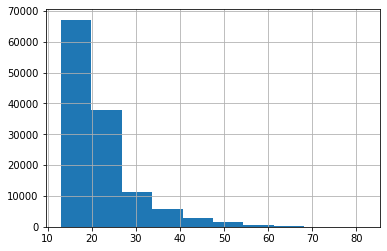

In [14]:
dados.NU_IDADE.hist()

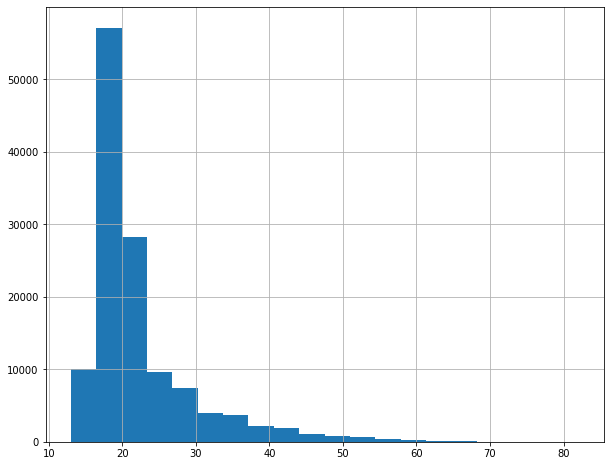

In [15]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8))

In [16]:
dados.query("IN_TREINEIRO ==1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

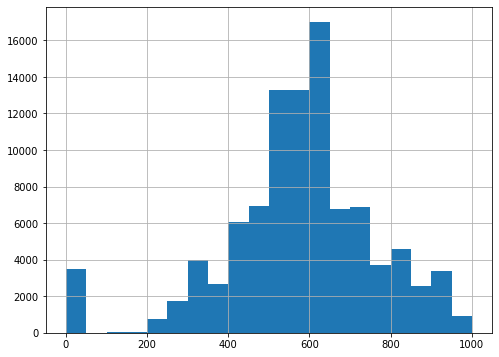

In [17]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize=(8, 6))

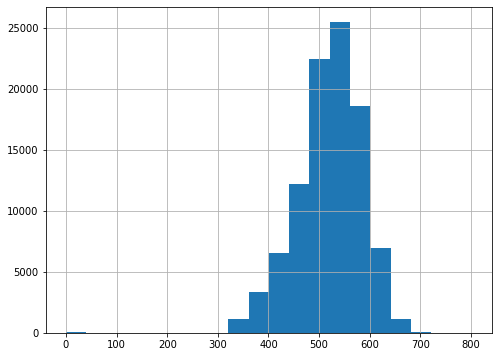

In [18]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize=(8, 6))

In [19]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

**Desvio Padrão**

Analisar o quanto a minha nota está distante da média, tanto positivamente ou negativamente.

In [20]:
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [21]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


> + LC (linguagens, códigos e suas tecnologias); 
+ CH (ciências humanas e suas tecnologias); 
+ CN (ciências da natureza e suas
tecnologias); 
+ MAT (matemática e suas tecnologias); 
+ RED (redação).


**Dispersão dos dados**

In [22]:
dados.NU_NOTA_LC.quantile(q=0.50)

526.1

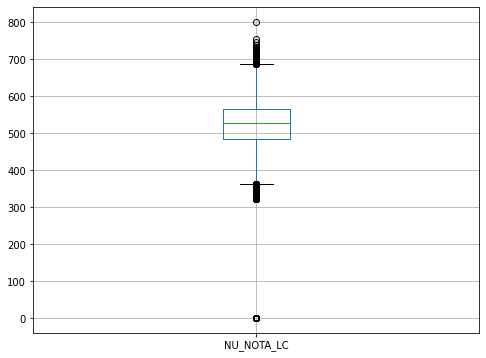

In [23]:
dados['NU_NOTA_LC'].plot.box(figsize=(8,6), grid=True)

***O gráfico boxplot mostra onde está a maior concentração das notas.**

O retangulo possui a informação dos quartis:

A aresta inferior da caixa representa o primeiro quartil (Q1), a aresta superior representa o terceiro quartil(Q3) e um traço interno à caixa representa a mediana (Q2) de uma amostra

+ **Q1** - amostra de 25% da concentração das notas 
+ **Q2** - amostra de 50% da concentração das notas
+ **Q3** - amostra de 75% da concentração das notas

A linha verde que corta o retângulo representa a mediana, a concentração das notas 50% pra baixo e 50% pra cima.

Os pontos destacados no grafico representa a dispersão dos pontos "notas".



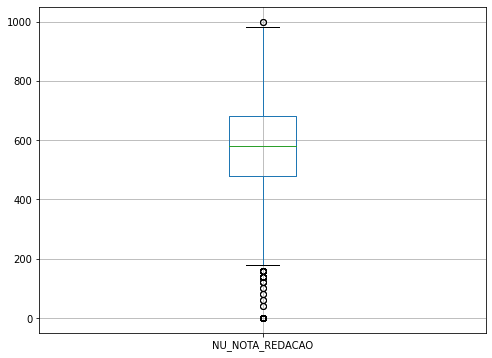

In [24]:
dados['NU_NOTA_REDACAO'].plot.box(figsize=(8,6), grid=True)

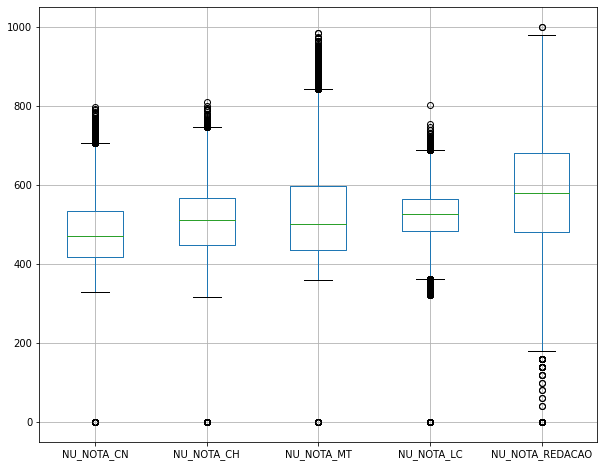

In [25]:
dados[provas].plot.box(figsize=(10,8), grid=True)

*Boxplot com todas as colunas, mostra uma noção maior da distribuição das notas, podendo trazer uma melhor resposta dependendo da sua pergunta. 

**Obs:** Olhando para a nota "NU_NOTA_LC" podemos ver que os dados estão menos dispersos com o retangulo menor, em comparação a nota de redaçao "NU_NOTA_REDACAO" com o retângulo maior.

*Através do gráfico boxplot conseguimos entender o quão dispersos estão esses dados. Uma análise geral dos dados e não apenas a média.

## Propostas de Desafios

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

Desafio Extra: Com qual frequencia um inscrito de um estado faz a prova em outro estado


#### Desafio 01 - Proporção dos inscritos por idade

In [58]:
#solucao1
df_proporcao_idade = (dados.NU_IDADE.value_counts() / dados.NU_INSCRICAO.size) * 100
df_proporcao_idade = df_proporcao_idade.sort_index()
df_proporcao_idade

13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [59]:
#solução2
qtd_candidatos = len(dados["NU_IDADE"])
total_idade = dados["NU_IDADE"].value_counts()
percent_idade = total_idade / qtd_candidatos * 100

df = pd.concat([total_idade, percent_idade], axis=1, sort=True)
df.columns = ['QTDE', 'PERCENTUAL']
df

,QTDE,PERCENTUAL
13,4,0.003140
14,141,0.110692
15,2009,1.577171
16,7830,6.146962
17,21256,16.687078
...,...,...
73,2,0.001570
75,2,0.001570
76,1,0.000785
77,1,0.000785


In [27]:
type(df_proporcao_idade)

pandas.core.series.Series

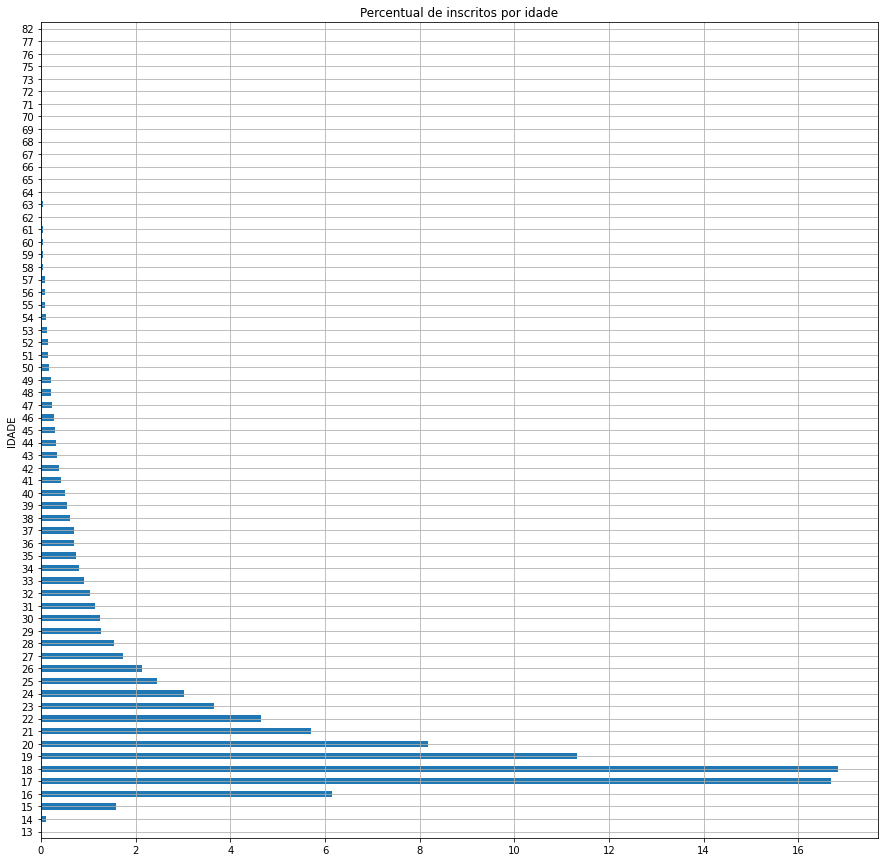

In [29]:
df_proporcao_idade.plot.barh(figsize=(15, 15), grid=True, xlabel='IDADE', title='Percentual de inscritos por idade')

#### Desafio 02 - Descobrir de quais estados são os inscritos com 13 anos

In [30]:
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA'].value_counts()

SP    1
MT    1
BA    1
AP    1
Name: SG_UF_RESIDENCIA, dtype: int64

#### Desafio 03: Adicionar título no gráfico

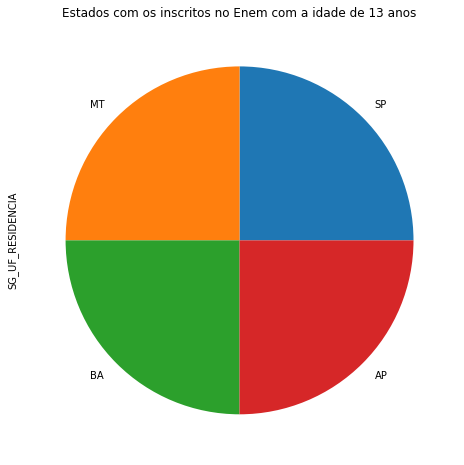

In [62]:
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA'].value_counts().plot.pie(figsize = (10,8), title='Estados com os inscritos no Enem com a idade de 13 anos')

#### Desafio 04: Plotar os Histogramas das idades dos treineiro e não treineiros.

In [32]:
df_treineiros = dados.query("IN_TREINEIRO == 1")["NU_IDADE"]
df_nao_treineiros = dados.query("IN_TREINEIRO == 0")["NU_IDADE"]

In [33]:
df_treineiros_nao_treineiros = pd.DataFrame(dict({"treineiros": df_treineiros, "não treineiros": df_nao_treineiros}))
df_treineiros_nao_treineiros

,treineiros,não treineiros
0,17.0,NaN
1,NaN,23.0
2,NaN,35.0
3,NaN,23.0
4,16.0,NaN
...,...,...
127375,NaN,17.0
127376,NaN,18.0
127377,NaN,22.0
127378,NaN,26.0


Text(0.5, 0, 'Idade')

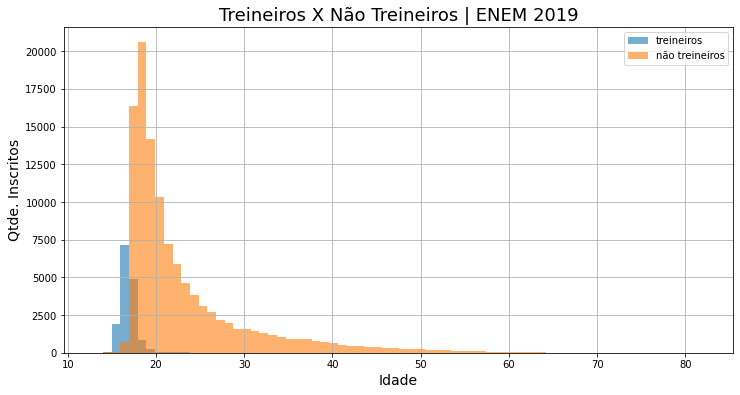

In [34]:
ax = df_treineiros_nao_treineiros.plot.hist(figsize=(12, 6), bins=70, alpha=.6, grid=True)
ax.set_title("Treineiros X Não Treineiros | ENEM 2019", fontsize=18)
ax.set_ylabel("Qtde. Inscritos", fontsize=14)
ax.set_xlabel("Idade", fontsize=14)

#### Desafio 05: Comparar as distribuições das provas em inglês espanhol

In [35]:
dados.TP_LINGUA.unique()

array([1, 0])

In [36]:
df_notas_ingles = dados.query('TP_LINGUA == 1')["NU_NOTA_LC"]
df_notas_espanhol = dados.query('TP_LINGUA == 0')["NU_NOTA_LC"]

In [37]:
df_notas_ingles_espanhol = pd.DataFrame(data=dict({"Ingles": df_notas_ingles, "Espanhol":df_notas_espanhol}))

Text(0.5, 0, 'Matéria')

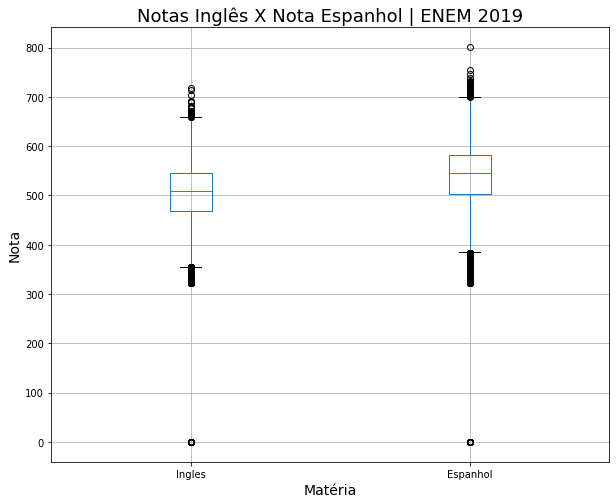

In [38]:
ax = df_notas_ingles_espanhol.plot.box(figsize=(10,8), grid=True)

ax.set_title("Notas Inglês X Nota Espanhol | ENEM 2019", fontsize=18)
ax.set_ylabel("Nota", fontsize=14)
ax.set_xlabel("Matéria", fontsize=14)

#### Desafio 6: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

#### Desafio Extra: Com qual frequencia um inscrito de um estado faz a prova em outro estado